In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


## 1. Starter Analysis

In [4]:
spotify_stream_df = pd.read_json("MyData/StreamingHistory0.json")
spotify_stream_df.tail()

,endTime,artistName,trackName,msPlayed
8836,2023-05-05 14:21,A$AP Ferg,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",709
8837,2023-05-05 14:21,A$AP Ferg,Floor Seats,0
8838,2023-05-05 14:21,Kendrick Lamar,u,833
8839,2023-05-05 14:26,Baby Keem,trademark usa,270670
8840,2023-05-05 14:27,A$AP Ferg,Floor Seats,70224


In [5]:
spotify_stream_df.shape

(8841, 4)

In [6]:
spotify_stream_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     8841 non-null   object
 1   artistName  8841 non-null   object
 2   trackName   8841 non-null   object
 3   msPlayed    8841 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 276.4+ KB


In [7]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       4667
artistName     695
trackName     1816
msPlayed      4715
dtype: int64

In [8]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed
5538,2023-03-16 02:47,2Pac,All Eyez On Me (ft. Big Syke),954
1523,2023-01-01 05:29,Kendrick Lamar,Now Or Never - Bonus Track,4602
3858,2023-02-11 20:39,Genjutsu Beats,Sparta,0
4781,2023-02-24 15:14,King,Ektarfa,14089
1203,2022-12-26 10:58,Unknown Artist,Unknown Track,721
7119,2023-04-05 18:08,Rashid Ali,Kabhi Kabhi Aditi,218836
6496,2023-03-27 08:30,Sidharth Basrur,Mujhe De De Har Gham Tera,25727
5604,2023-03-17 14:31,Joji,Die For You,211666
1886,2023-01-09 11:27,Bas,[The Jackie] (with J. Cole & Lil Tjay),3303
6695,2023-03-30 04:44,Lil Durk,JUMP (feat. Memo600),192718


In [9]:
len(spotify_stream_df["artistName"].unique()) # Length of unique artist

695

there's 695 number of unique artist in my streaming history

In [10]:
len(spotify_stream_df["trackName"].unique()) # Length of unique tracks

1816

there's 1816 number of unique songs in my streaming history

## 2. Cleaning and Formatting Data

pd.to_datetime method from Pandas module to convert a object column into proper date time column.

using the to_datetime module to obatin the proper date time format and then we added that into a new column called Play-Time.

In [11]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"])

- year has information about the year when we played that song
- month has information about the month when we played that song
- weekday has information about the weekday when we played that song
- time has information about the time when we played that song
- hours has information about the hour when we played that song
- day-name has information about the day with the name when we played that song. apply method for pandas dataframe with lambda function.
- new column count to keep track of the count of the songs.

In [12]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1 

In [13]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

hours and minutes calculation

In [14]:
def hours(td):
    return td.seconds/3600

def minutes(td):
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)


In [15]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
5631,2023-03-18 09:12,42 Dugg,Bestfriends,132793,2023-03-18 09:12:00,2023,3,18,5,09:12:00,9,Saturday,1,0 days 00:02:12.793000,0.037,2.200
73,2022-12-02 21:19,Kodak Black,Super Gremlin,142890,2022-12-02 21:19:00,2022,12,2,4,21:19:00,21,Friday,1,0 days 00:02:22.890000,0.039,2.367
525,2022-12-13 17:33,Metro Boomin,Niagara Falls (Foot or 2) [with Travis Scott &...,13502,2022-12-13 17:33:00,2022,12,13,1,17:33:00,17,Tuesday,1,0 days 00:00:13.502000,0.004,0.217
7883,2023-04-20 07:57,Tory Lanez,Broke In A Minute,1029,2023-04-20 07:57:00,2023,4,20,3,07:57:00,7,Thursday,1,0 days 00:00:01.029000,0.000,0.017
8363,2023-04-27 21:13,Drake,Wants and Needs (feat. Lil Baby),192698,2023-04-27 21:13:00,2023,4,27,3,21:13:00,21,Thursday,1,0 days 00:03:12.698000,0.053,3.200
3813,2023-02-11 17:20,Shankar-Ehsaan-Loy,Zinda,211120,2023-02-11 17:20:00,2023,2,11,5,17:20:00,17,Saturday,1,0 days 00:03:31.120000,0.059,3.517
7717,2023-04-16 07:27,J. Cole,m y . l i f e (with 21 Savage & Morray),6394,2023-04-16 07:27:00,2023,4,16,6,07:27:00,7,Sunday,1,0 days 00:00:06.394000,0.002,0.100
6584,2023-03-28 05:34,Kendrick Lamar,These Walls,91183,2023-03-28 05:34:00,2023,3,28,1,05:34:00,5,Tuesday,1,0 days 00:01:31.183000,0.025,1.517
2221,2023-01-14 03:43,Kendrick Lamar,YAH.,160293,2023-01-14 03:43:00,2023,1,14,5,03:43:00,3,Saturday,1,0 days 00:02:40.293000,0.044,2.667
748,2022-12-22 11:51,Drake,Rich Flex,7756,2022-12-22 11:51:00,2022,12,22,3,11:51:00,11,Thursday,1,0 days 00:00:07.756000,0.002,0.117


dropping
1. endTime as we have Play-Time column
2. msPlayed as we got the Time-Played (hh-mm-ss)
3. Time-Played (hh-mm-ss) as we got the approx time in minutes and hours in Listening Time(Hours) and Listening Time(Minutes).


In [16]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [17]:
spotify_stream_df.describe()

,Play-Time,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,8841,8841.000000,8841.000000,8841.000000,8841.000000,8841.000000,8841.0,8841.000000,8841.000000
mean,2023-02-20 10:03:08.232100352,2022.829205,4.239792,15.386834,2.965502,11.719602,1.0,0.023426,1.399756
min,2022-07-14 16:51:00,2022.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2023-01-13 16:11:00,2023.000000,2.000000,7.000000,1.000000,7.000000,1.0,0.000000,0.017000
50%,2023-02-20 07:38:00,2023.000000,3.000000,16.000000,3.000000,12.000000,1.0,0.003000,0.183000
75%,2023-03-29 17:26:00,2023.000000,4.000000,23.000000,5.000000,17.000000,1.0,0.050000,3.017000
max,2023-05-05 14:27:00,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,1.208000,12.500000
std,NaN,0.376351,3.676968,8.744404,1.928251,6.092721,0.0,0.031115,1.709932


## 3. Exploratory Data Analysis and Visualization

In [18]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/tmp/ipykernel_6975/1738326915.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### 3.1 unique artist exploration

In [19]:
unique_artists = spotify_stream_df["artistName"].nunique() 
total_artists = spotify_stream_df["artistName"].count() 
unique_artist_percentage = unique_artists/total_artists*100 
unique_artist_percentage

7.8611016853297135

### 3.2 top 10 unique artist

In [21]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Metro Boomin,27.558,1654.526,893
Kendrick Lamar,24.485,1471.179,1098
21 Savage,16.434,987.067,611
Drake,9.393,565.509,400
Kanye West,8.778,526.805,345
Baby Keem,5.862,351.867,259
Joji,5.480,329.040,270
Travis Scott,5.002,299.826,230
The Local Train,3.543,211.851,132


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Metro Boomin'),
  Text(1, 0, 'Kendrick Lamar'),
  Text(2, 0, '21 Savage'),
  Text(3, 0, 'Drake'),
  Text(4, 0, 'Kanye West'),
  Text(5, 0, 'Baby Keem'),
  Text(6, 0, 'Joji'),
  Text(7, 0, 'Travis Scott'),
  Text(8, 0, 'The Local Train'),
  Text(9, 0, 'Aditya Rikhari')])

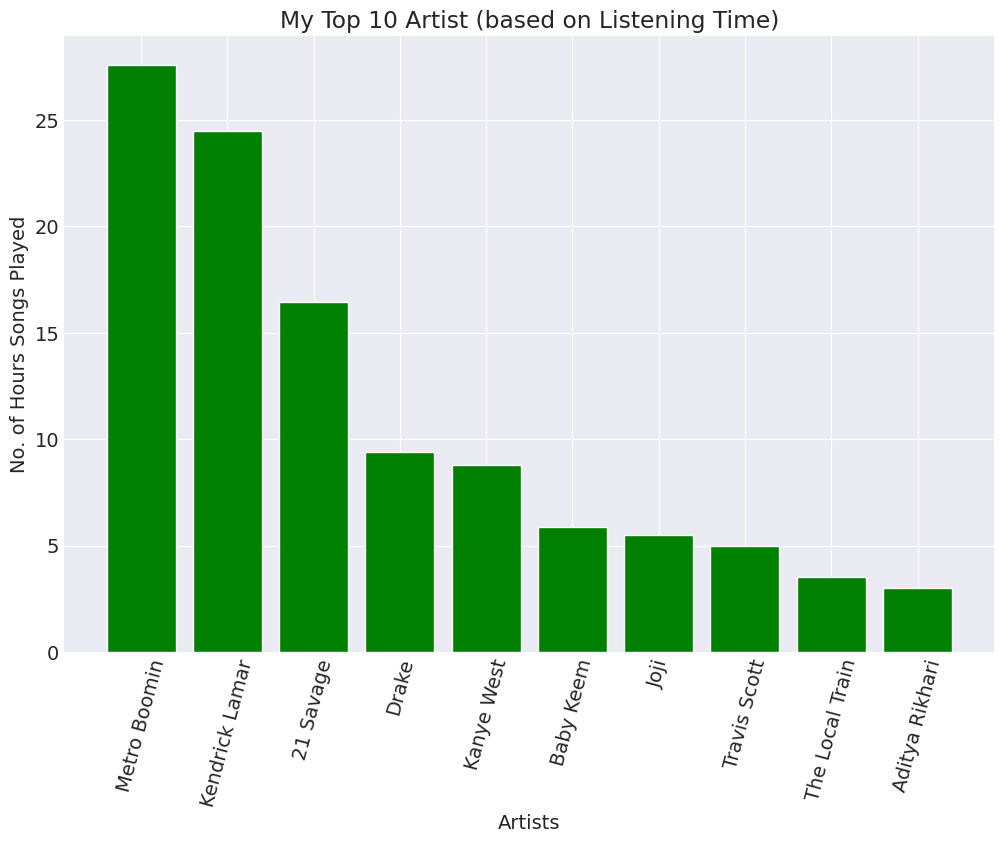

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Artist (based on Listening Time)",xlabel="Artists",ylabel="No. of Hours Songs Played")
plt.xticks(rotation=75)